In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from neuralforecast import NeuralForecast
from neuralforecast.losses.numpy import smape
from datasetsforecast.m3 import M3    
from neuralforecast.losses.pytorch import SMAPE
import hydra
from omegaconf import DictConfig


## models
from neuralforecast.auto import AutoDeepAR, AutoNBEATS, AutoNHITS, AutoTFT, AutoTCN, AutoRNN, AutoLSTM
from neuralforecast.models import DeepAR, NBEATS, NHITS, TFT, TCN, RNN, LSTM

c:\Users\ricar\mixture_of_experts_time_series\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-03 20:59:02,315	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-03 20:59:02,488	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


c:\Users\ricar\mixture_of_experts_time_series\venv\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
INFO:root:using dataset already processed in path C:\Users\ricar\.gluonts\datasets\tourism_monthly.



==== Running experiment for dataset: gluonts_tourism_monthly ====
Loading tourism_monthly dataset...


Seed set to 1



--- Evaluating for horizon: 18 ---

>>> Running model: nbeatsMoe


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | HuberLoss     | 0      | train
1 | valid_loss   | HuberLoss     | 0      | train
2 | padder_train | ConstantPad1d | 0      | train
3 | scaler       | TemporalNorm  | 0      | train
4 | blocks       | ModuleList    | 400 K  | train
-------------------------------------------------------
399 K     Trainable params
1.6 K     Non-trainable params
400 K     Total params
1.602     Total estimated model params size (MB)
182       Modules in train mode
0         Modules in eval mode


Epoch 116:  67%|██████▋   | 8/12 [00:01<00:00,  6.18it/s, v_num=12, train_loss_step=1.22e+3, train_loss_epoch=1.19e+3, valid_loss=2.61e+3] 

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 12/12 [00:00<00:00, 36.88it/s][array([[[0.49701634, 0.        , 0.5029836 , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.6009427 , 0.39905736, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.68441784, 0.        , 0.31558213,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.28979376, 0.        , 0.        ,
         0.        , 0.7102062 , 0.        ],
        [0.5403578 , 0.        , 0.4596422 , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.5147571 , 0.        ,
         0.        , 0.        , 0.4852429 ],
        [0.        , 0.        , 0.        , 0.63682765, 0.        ,
         0.3631724 , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.4771661 , 0.        ,
         0.        , 0.52283394, 0.        ],
       

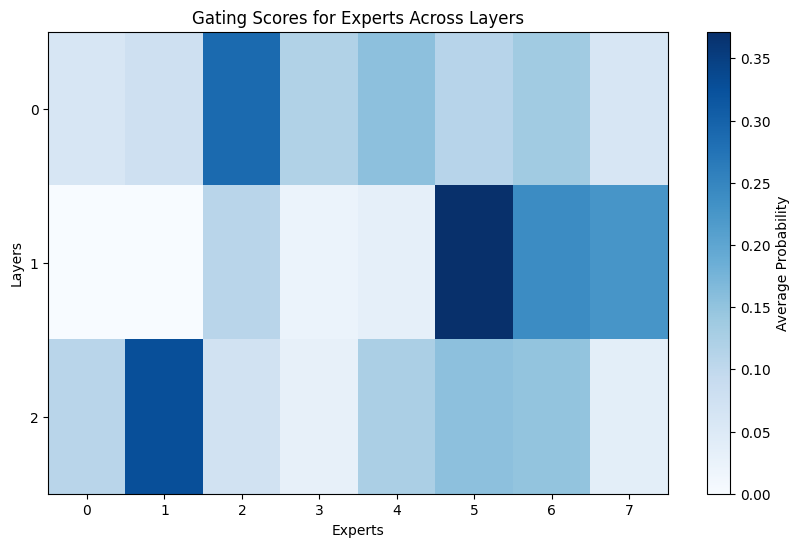

Predicting DataLoader 0: 100%|██████████| 12/12 [00:00<00:00, 23.36it/s]
Model 'nbeatsMoe' config 0: sMAPE = 0.255
Mean sMAPE for horizon 18: 0.255


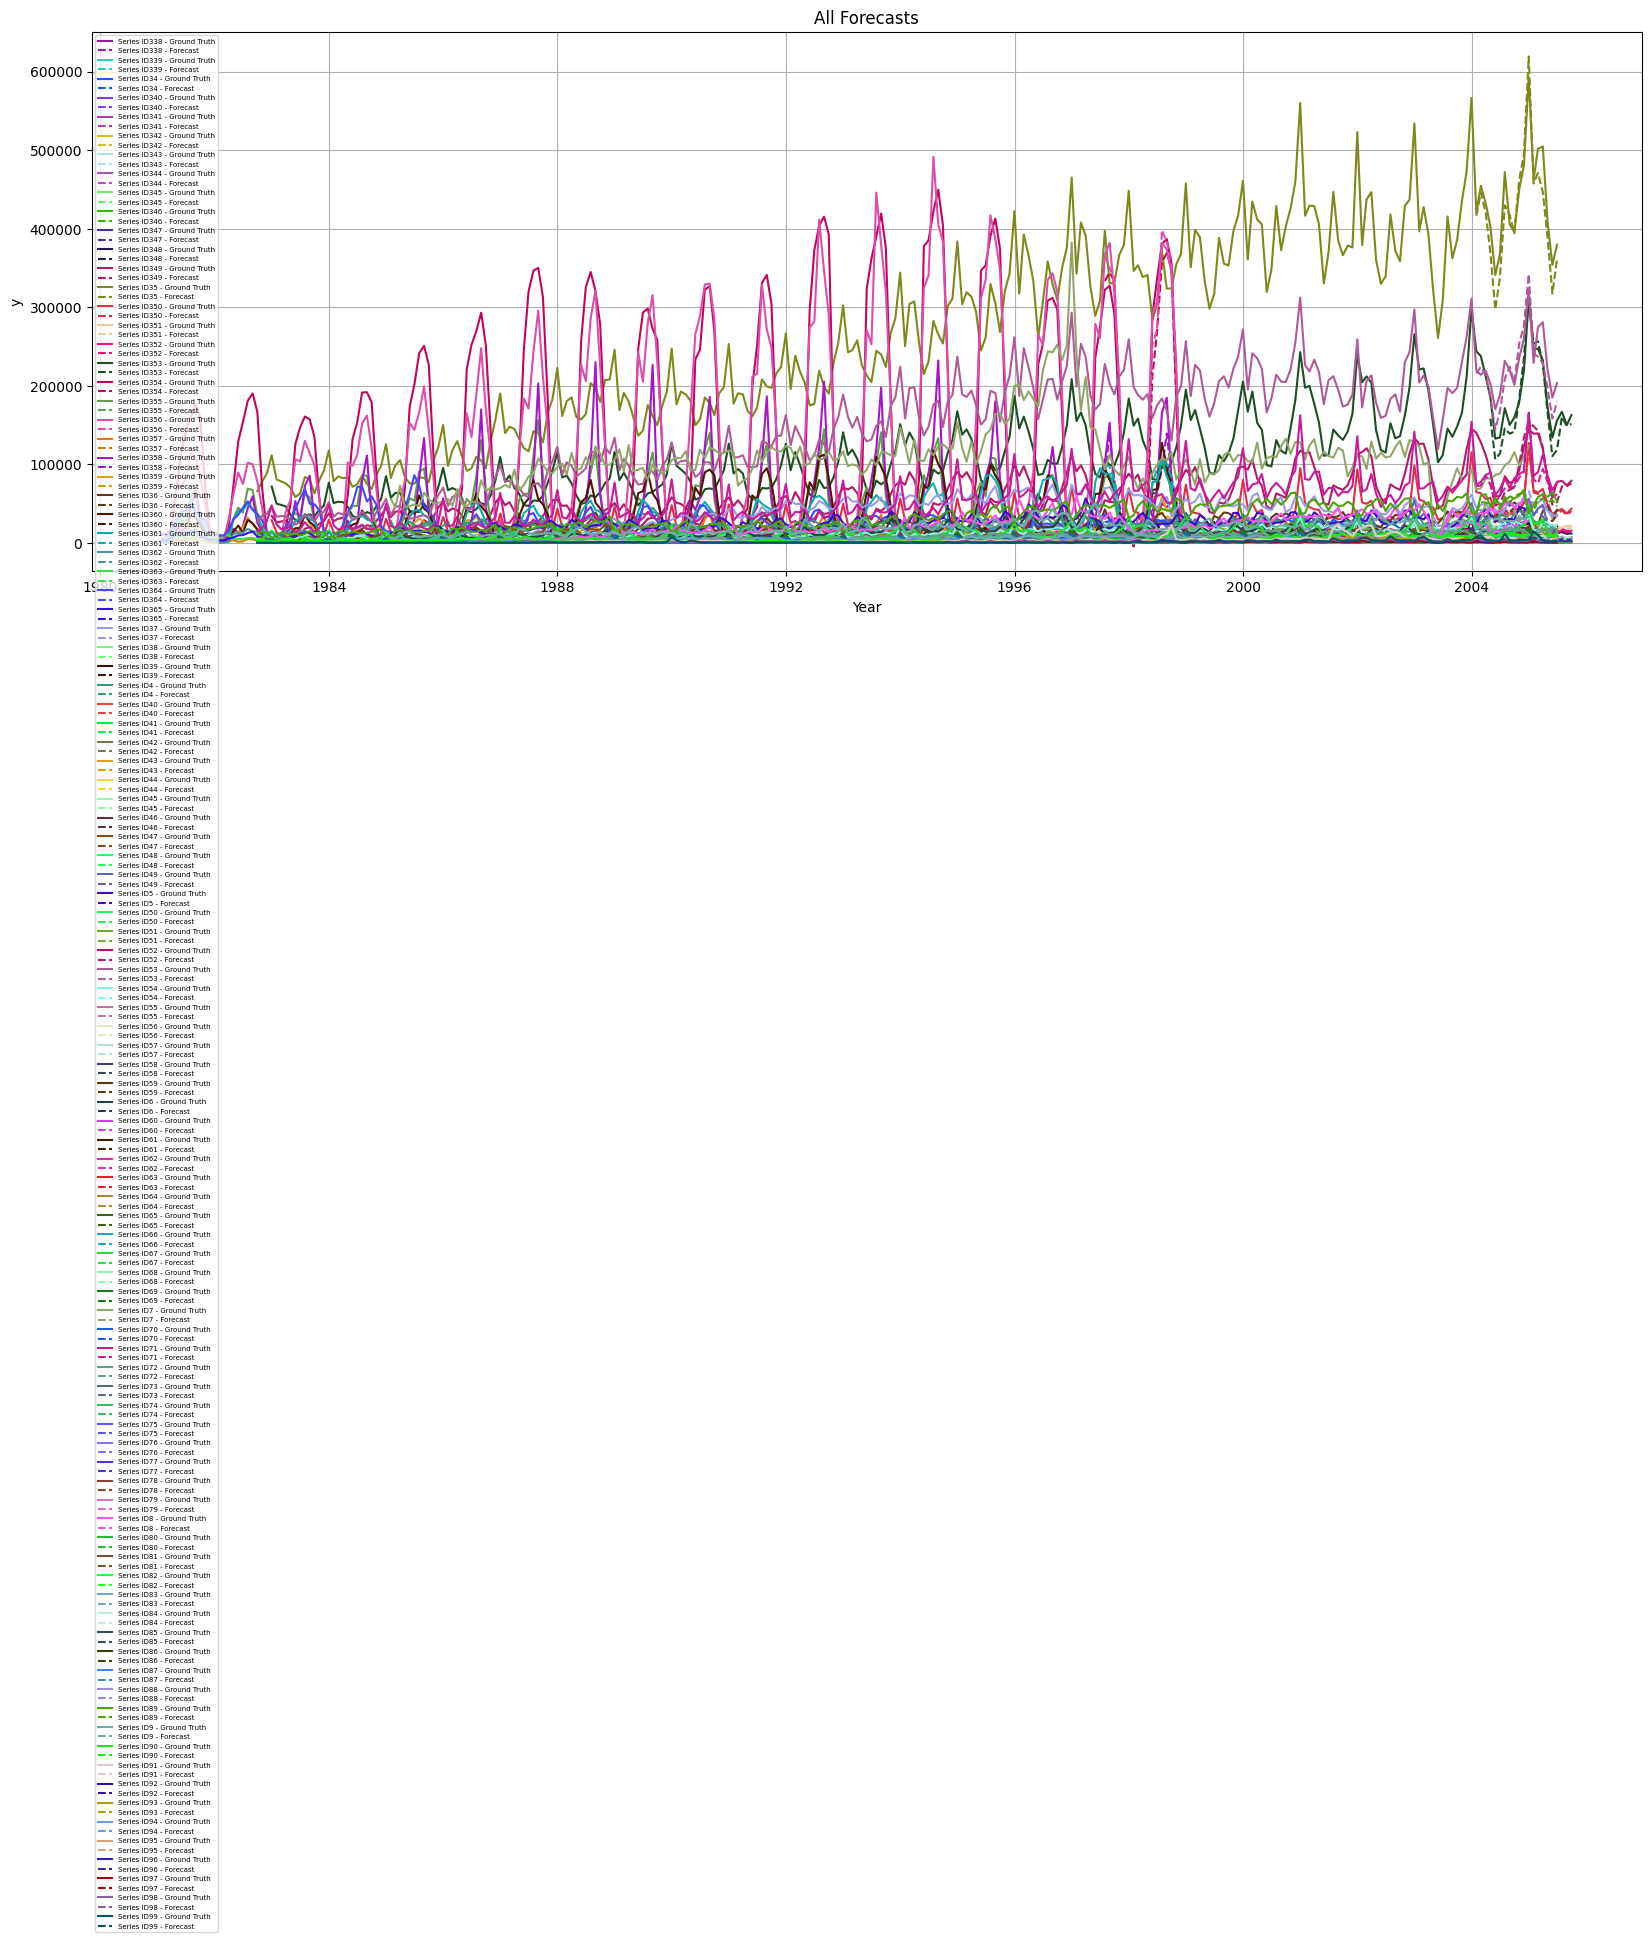

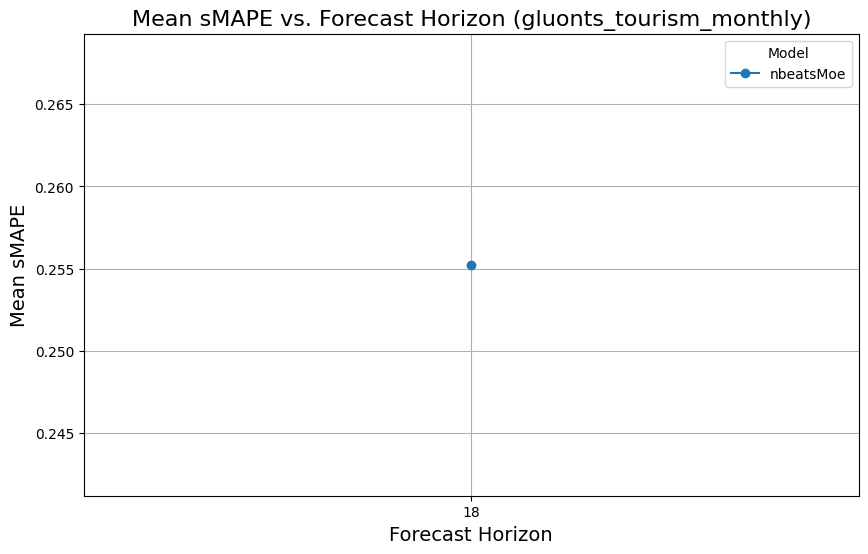

In [3]:
import run_model as utils


def run_all_models():
    hydra.initialize(config_path="./../conf")
    cfg = hydra.compose(config_name="config.yaml")
    
    results, forecasts, callbacks = utils.run_exp(cfg)
    results.to_csv("results.csv", index=False)

    return results, forecasts, callbacks
results, forecasts, callbacks = run_all_models()

In [ ]:
callbacks[0][0].get_gate_values()




[]